# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Valerie Johnson
### Week 7-Final Project Repo: https://github.com/Valpal84/WK7_Final_Project

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Installing/importing necessary dependencies

In [7]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list
print('All prereqs installed')

Package                   Version
------------------------- ------------
annotated-types           0.7.0
anyio                     4.0.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
black                     23.9.1
bleach                    6.0.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        3.2.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.0
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.8
decorator                 5.1.1
defusedxml       


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Question 1:

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [8]:
import requests
import pickle

# Get the necessary article (lyrics in this case)
response = requests.get('https://api.lyrics.ovh/v1/Imagine%20Dragons/Demons')

# Check status of the fetch
if response.status_code == 200:
    print("Fetch successful!")
    print("Content-Type:", response.headers['content-type'])

    # Get the lyrics text
    lyrics_data = response.json()  # The API returns JSON
    lyrics = lyrics_data.get("lyrics", "No lyrics found.")  # Extract lyrics

    # Create a simple HTML structure
    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Song Lyrics: Imagine Dragons - Demons</title>
    </head>
    <body>
        <h1>Imagine Dragons - Demons</h1>
        <pre>{lyrics}</pre>
    </body>
    </html>
    """

    # Save the HTML to a file
    with open('song_lyrics.html', 'w', encoding='utf-8') as html_file:
        html_file.write(html_content)
    print("HTML file created: song_lyrics.html")

    # Create a pickle file for HTML content
    with open('song_html.pkl', 'wb') as pickle_file:
        pickle.dump(html_content, pickle_file)

    # Read back the pickle file
    with open('song_html.pkl', 'rb') as pickle_file:
        loaded_html = pickle.load(pickle_file)
        print("HTML loaded from pickle:", loaded_html[:100], "...")  # Print a snippet of the HTML
else:
    print(f"Failed to fetch lyrics: {response.status_code}")





Fetch successful!
Content-Type: application/json; charset=utf-8
HTML file created: song_lyrics.html
HTML loaded from pickle: 
    <!DOCTYPE html>
    <html>
    <head>
        <title>Song Lyrics: Imagine Dragons - Demons</tit ...


### Question 2:

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [9]:
# Imports
from textblob import TextBlob
import nltk
nltk.download('punkt_tab')


#Read in HTML file
with open('song_lyrics.html', 'r', encoding='utf-8') as html_file:
    soup = BeautifulSoup(html_file, 'html.parser')

#Extract the lyrics
lyrics_text = soup.find('pre').get_text()

#Process the lyrics to remove the \n breaks and add periods so it doesn't interpret the entire lyric set as one sentence.
processed_lyrics = lyrics_text.replace('\n', '. ')

#Print snippet of processed lyrics
print(f"Processed lyrics text:", processed_lyrics[:100], "...")

#Perform sentiment analysis
blob = TextBlob(processed_lyrics)
polarity = blob.sentiment.polarity

#Create a sentiment label 
if polarity > 0:
    sentiment_is = "Positive"
elif polarity < 0:
    sentiment_is = "Negative"
else:
    sentiment_is = "Neutral"

#Print the sentiment polarity score and the appropriate label
print(f"The sentiment polarity of the lyrics is: {polarity:.2f} which is a {sentiment_is} polarity score")

#Count the number of sentences
sentence_count = len(blob.sentences)

#Print the number of sentences with an appropriate label
print(f"Number of sentences in the lyrics: {sentence_count}")

Processed lyrics text: When the days are cold. . And the cards all fold. . And the saints we see. . Are all made of gold. . ...
The sentiment polarity of the lyrics is: -0.19 which is a Negative polarity score
Number of sentences in the lyrics: 149


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Valer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Question 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [10]:
#Load spaCy pipeline
nlp = spacy.load("en_core_web_sm")

#Process the lyrics with spaCy
doc = nlp(processed_lyrics)

#Filter common tokens, excluding punctuation and white space
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

#Count token frequencies
token_frequencies = Counter(tokens)

#Get the five most frequent tokens
most_frequent_tokens = token_frequencies.most_common(5)

#Print the five most common tokens and their frequencies
print("\033[1m\033[32mTop Five Most Frequent Tokens\033[0m")
for token, freq in most_frequent_tokens:
    print(f"Token:{token}, Frequency: {freq}")

Top Five Most Frequent Tokens
Token:my, Frequency: 23
Token:'s, Frequency: 21
Token:it, Frequency: 18
Token:the, Frequency: 15
Token:hide, Frequency: 15


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [11]:
#Load spaCy pipeline
nlp = spacy.load("en_core_web_sm")

#Process the lyrics with spaCy
doc = nlp(processed_lyrics)

#Filter common tokens, excluding punctuation and white space
tokens = [token for token in doc if token.is_alpha and not token.is_stop]

#Count token frequencies
token_frequencies = Counter(token.text.lower() for token in tokens)

#Get the five most frequent tokens
most_frequent_tokens = token_frequencies.most_common(5)

#Retrieve lemmas for the most frequent tokens
lemmas_with_frequencies = {
    token.text.lower(): token.lemma_
    for token in tokens
    if token.text.lower() in dict(most_frequent_tokens)
}

#Print the common lemmas with frequencies
print("\033[1m\033[32mMost common lemmas\033[0m")
for token, lemma in lemmas_with_frequencies.items():
    print(f"Lemma: {lemma}, Frequency: {freq}")

Most common lemmas
Lemma: want, Frequency: 15
Lemma: hide, Frequency: 15
Lemma: inside, Frequency: 15
Lemma: come, Frequency: 15
Lemma: demon, Frequency: 15


### Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Number of Sentences In the song:  67


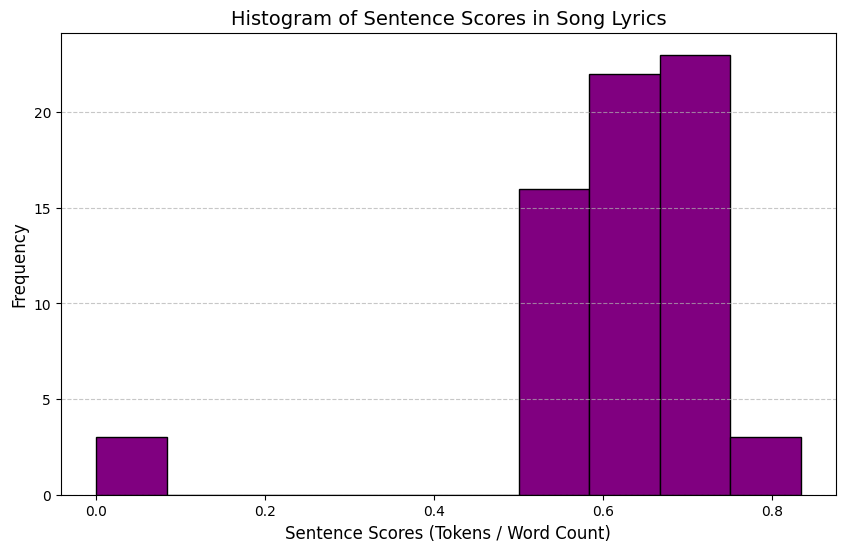

In [18]:
import spacy
import matplotlib.pyplot as py

# Load text into spacy pipeline
nlp = spacy.load("en_core_web_sm")
doc = nlp(processed_lyrics)

#Tokenize article into sentences
sentences = list(doc.sents)

#Calculate the score for each sentence
sentence_scores = [
    len([token for token in sent if token.is_alpha]) / len(sent) if len(sent) > 0 else 0
    for sent in sentences
]
#Print the number of sentences in the lyrics
num_sentences = len(list(doc.sents))
print("Number of Sentences In the song: ", num_sentences)

#Plot a histogram of sentence scores
plt.figure(figsize=(10, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=2)
plt.hist(sentence_scores, bins=10, color='purple', edgecolor='black', zorder=0)
plt.title("Histogram of Sentence Scores in Song Lyrics", fontsize=14)
plt.xlabel("Sentence Scores (Tokens / Word Count)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

#It appears that most of the scores are between 0.5 and 0.8.



6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?